# Decision Tree with scikit-learn
Visit this website for more information: `https://scikit-learn.org`
Decision tree examples can be found here: `https://github.com/PacktPublishing/Hands-On-Data-Science-and-Python-Machine-Learning`

Install these packages:
- numpy
- pandas
- pydoop
- sklearn
- scipy

In [1]:
import numpy as np
import pandas as pd
import pydoop.hdfs as hd

from sklearn import tree
from scipy import stats

## Decision tree

In [2]:
# Load csv file - it contains a column header at row 0 (or first row).
# input_file = "/home/student/cisc_525/ml-py/PastHires.csv"
# To open with hadoop hdfs, import pydoop.hdfs. Open file with hdfs then read
# input.
# Local file is simpler.
input_file = "/user/student/PastHires.csv"
with hd.open(input_file) as f:
    df = pd.read_csv(f, header = 0)

In [3]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [4]:
# Y/N mapping.
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

# Degrees mapping
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [5]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [6]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
X

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0
5,0,0,0,2,1,1
6,5,1,2,1,0,1
7,3,0,1,0,0,1
8,15,1,5,0,0,0
9,0,0,0,0,0,0


In [7]:
# install graphviz via this command.
# sudo apt install python-pydot python-pydot-ng graphviz

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

### The order of the features

Features are as follows:
    
```
['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

```


In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]])) # 10 years, employed, 4 previous employers; BS; not top tier school; not interned
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))


[1]
[0]


## Basic Statistics with numpy, scipy & plot libraries

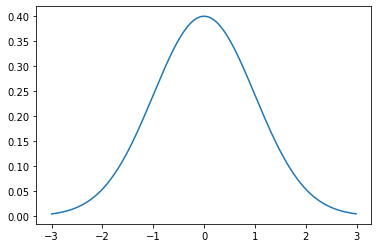

In [9]:
# Plotting a perfect normal distribution (600 values evenly distributed)
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.01)  # 3 - (-3) = 6; 6 * 100 = 600; 0.01 = 1/100.
len(x)
plt.plot(x, norm.pdf(x))
plt.show()

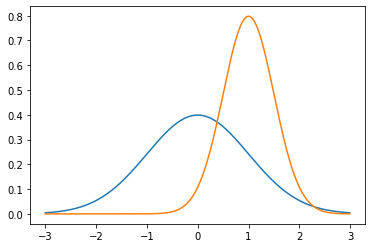

In [10]:
# shift plot to the right with scaling
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))  # location 1.0; scale 0.5
plt.show()

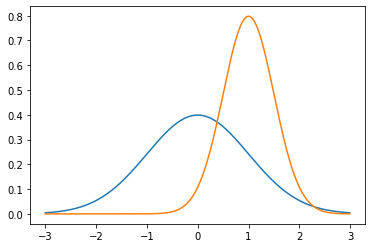

In [11]:
# save plot into file
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.savefig('/tmp/MyPlot.png', format='png') # save image into a file

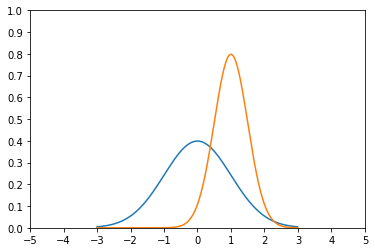

In [12]:
# set x,y limits & ticks
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

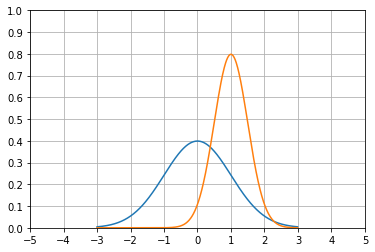

In [13]:
# With grid
axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

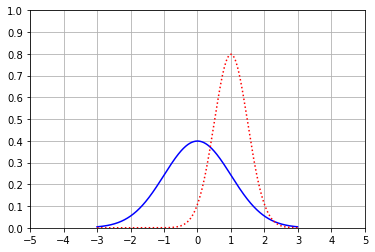

In [14]:
# various options see here: https://matplotlib.org/api/pyplot_api.html

axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()
plt.plot(x, norm.pdf(x), 'b-') # blue solid line time
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:') # red dotted line
plt.show()

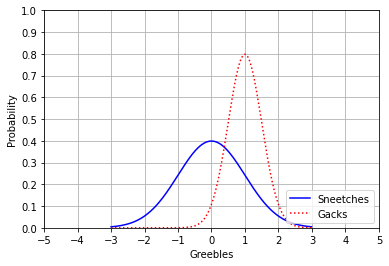

In [15]:
# added labels & legends

axes = plt.axes()
axes.set_xlim([-5, 5])
axes.set_ylim([0, 1.0])
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axes.grid()
plt.xlabel('Greebles')
plt.ylabel('Probability')
plt.plot(x, norm.pdf(x), 'b-')
plt.plot(x, norm.pdf(x, 1.0, 0.5), 'r:')
plt.legend(['Sneetches', 'Gacks'], loc=4)
plt.show()

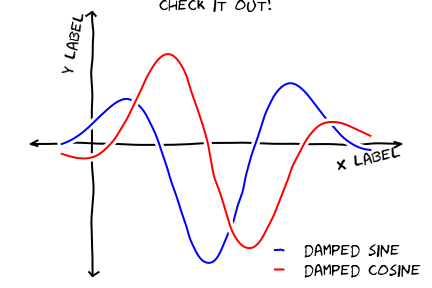

In [16]:
# XKCD-style plots with matplotlib
Image('http://jakevdp.github.com/figures/xkcd_version.png')

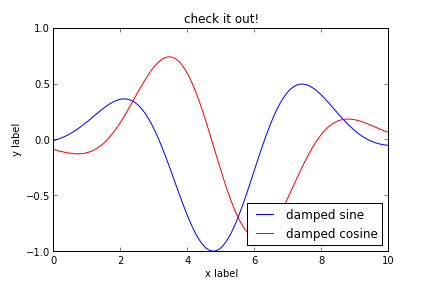

In [17]:
Image('http://jakevdp.github.com/figures/mpl_version.png')

Text(0, 0.5, 'my overall health')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


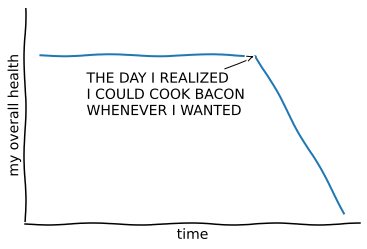

In [18]:
# using XKCD comic drawing ...

plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health')

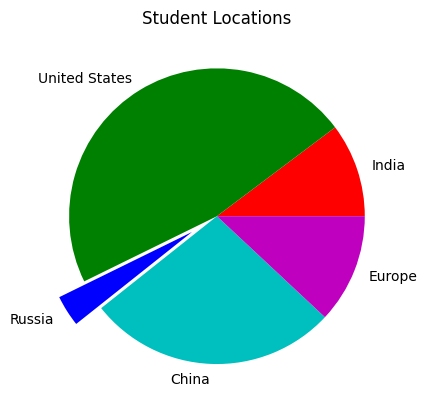

In [19]:
# Remove XKCD mode:
# pie chart
plt.rcdefaults()

values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
explode = [0, 0, 0.2, 0, 0]
labels = ['India', 'United States', 'Russia', 'China', 'Europe']
plt.pie(values, colors= colors, labels=labels, explode = explode)
plt.title('Student Locations')
plt.show()

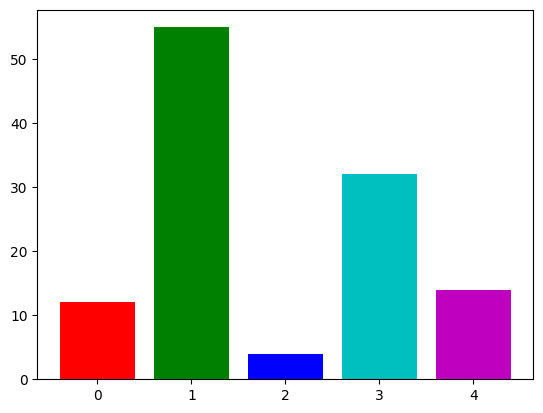

In [20]:
# bar chart
values = [12, 55, 4, 32, 14]
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(range(0,5), values, color= colors)
plt.show()

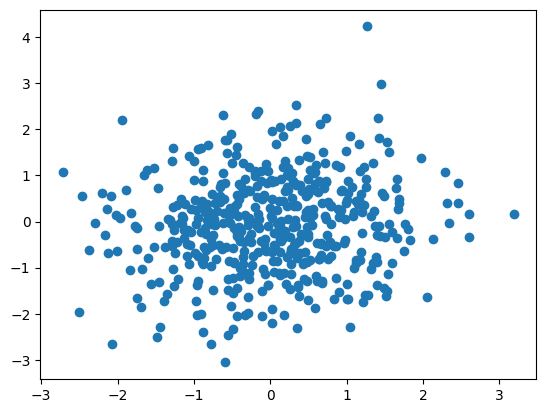

In [21]:
# scatter diagram
from pylab import randn

X = randn(500)
Y = randn(500)
plt.scatter(X,Y)
plt.show()

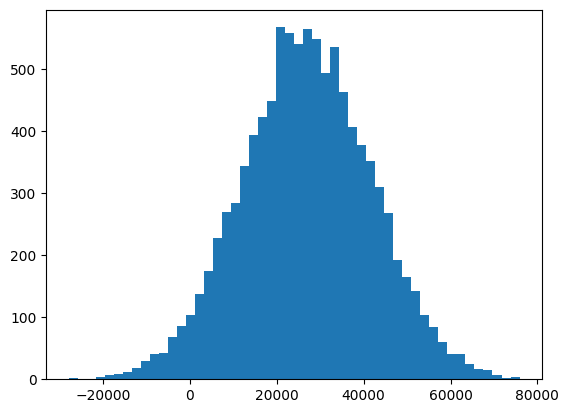

In [22]:
# histogram
incomes = np.random.normal(27000, 15000, 10000)
plt.hist(incomes, 50)
plt.show()

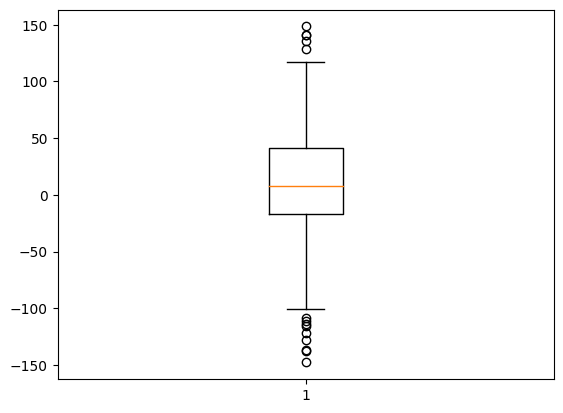

In [23]:
# boxplot
uniformSkewed = np.random.rand(100) * 100 - 40
high_outliers = np.random.rand(10) * 50 + 100
low_outliers = np.random.rand(10) * -50 - 100
data = np.concatenate((uniformSkewed, high_outliers, low_outliers))
plt.boxplot(data)
plt.show()

